# CI Assignment Part A

## 2. Processing data

In [956]:
import matplotlib.pyplot as plt
import numpy as nmp
import tensorflow
import pandas as pd
import os
import math

In [957]:
dataTable = pd.read_csv("C:/Users/miror/OneDrive - Ye9pfoBh9P/1_VUM_STUDY/3 year/01 Computational Intelligence/Assignment/Clean_Data_merged/cleandata.csv")

In [958]:
dataTable

,Unnamed: 0,acc_attr_x,acc_attr_y,acc_attr_z,lig_attr_db,mic_attr_db,activity,subject
0,0,1.570596,9.466674,-1.037288,43.163752,43.163752,climbingdown,8
1,1,1.565808,9.433155,-1.077391,41.066512,41.066512,climbingdown,8
2,2,1.562217,9.404425,-1.161786,42.328321,42.328321,climbingdown,8
3,3,1.568202,9.430760,-1.138443,39.511711,39.511711,climbingdown,8
4,4,1.531691,9.430161,-1.177349,38.312101,38.312101,climbingdown,8
...,...,...,...,...,...,...,...,...
5620,1113,-4.417901,19.608511,-10.108918,55.604324,55.604324,running,9
5621,1114,-19.609110,19.608511,-5.850232,58.605181,58.605181,running,9
5622,1115,-19.609110,19.608511,15.040974,61.460716,61.460716,running,9
5623,1116,-8.810662,19.608511,9.129689,62.726301,62.726301,running,9


### Encoding of activity column

In [959]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
activity = encoder.fit_transform(dataTable['activity'])

In [960]:
activity

array([0, 0, 0, ..., 3, 3, 3])

### Spliting to train and test data

In [961]:
x = dataTable.iloc[:, 1:-2].values
y = activity

In [962]:
x

array([[  1.5705963 ,   9.466674  ,  -1.0372878 ,  43.16375246,
         43.16375246],
       [  1.5658079 ,   9.433155  ,  -1.0773908 ,  41.06651168,
         41.06651168],
       [  1.5622166 ,   9.404425  ,  -1.1617863 ,  42.32832127,
         42.32832127],
       ...,
       [-19.60911   ,  19.608511  ,  15.040974  ,  61.46071606,
         61.46071606],
       [ -8.810662  ,  19.608511  ,   9.129689  ,  62.72630078,
         62.72630078],
       [  3.5326445 ,  18.299482  ,  12.2002535 ,  60.96283016,
         60.96283016]])

### Feature scalling 

In [963]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [964]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

____________________________________

## 3. Building the ANN

In [965]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.utils import np_utils

#### Encoding classes each type activity will be as column

In [966]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test) 

### Structure of the network

#### Initializing the ANN

In [967]:
ann = Sequential()

#### Adding the input layer and the first hidden layer

In [968]:
ann.add(Dense(input_shape = (5,), units = 72, activation = 'relu'))

#### Adding the second hidden layer

In [969]:
ann.add(Dense(units = 72, activation='relu'))

#### Adding the output layer

In [970]:
ann.add(Dense(units = 4, activation='softmax'))

In [971]:
len(activity)

5625

## 4. Training the ANN

### Compiling the ANN

In [972]:
ann.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])

### Summary of ANN

In [973]:
ann.summary()

Model: "sequential_39"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_117 (Dense)           (None, 72)                432       
                                                                 
 dense_118 (Dense)           (None, 72)                5256      
                                                                 
 dense_119 (Dense)           (None, 4)                 292       
                                                                 
Total params: 5,980
Trainable params: 5,980
Non-trainable params: 0
_________________________________________________________________


### Training the ANN on the Training set

In [974]:
history = ann.fit(X_train, y_train, batch_size=32, epochs=150)

Epoch 1/150
141/141 [==============================] - 0s 850us/step - loss: 0.7580 - accuracy: 0.6696
Epoch 2/150
141/141 [==============================] - 0s 824us/step - loss: 0.6043 - accuracy: 0.7429
Epoch 3/150
141/141 [==============================] - 0s 831us/step - loss: 0.5723 - accuracy: 0.7642
Epoch 4/150
141/141 [==============================] - 0s 875us/step - loss: 0.5398 - accuracy: 0.7858
Epoch 5/150
141/141 [==============================] - 0s 878us/step - loss: 0.5096 - accuracy: 0.8129
Epoch 6/150
141/141 [==============================] - 0s 882us/step - loss: 0.4795 - accuracy: 0.8296
Epoch 7/150
141/141 [==============================] - 0s 895us/step - loss: 0.4527 - accuracy: 0.8502
Epoch 8/150
141/141 [==============================] - 0s 845us/step - loss: 0.4298 - accuracy: 0.8567
Epoch 9/150
141/141 [==============================] - 0s 866us/step - loss: 0.4089 - accuracy: 0.8596
Epoch 10/150
141/141 [==============================] - 0s 830us/step - l

Epoch 80/150
141/141 [==============================] - 0s 904us/step - loss: 0.1740 - accuracy: 0.9316
Epoch 81/150
141/141 [==============================] - 0s 830us/step - loss: 0.1726 - accuracy: 0.9324
Epoch 82/150
141/141 [==============================] - 0s 1ms/step - loss: 0.1723 - accuracy: 0.9340
Epoch 83/150
141/141 [==============================] - 0s 1ms/step - loss: 0.1750 - accuracy: 0.9324
Epoch 84/150
141/141 [==============================] - 0s 897us/step - loss: 0.1719 - accuracy: 0.9369
Epoch 85/150
141/141 [==============================] - 0s 957us/step - loss: 0.1715 - accuracy: 0.9327
Epoch 86/150
141/141 [==============================] - 0s 811us/step - loss: 0.1725 - accuracy: 0.9311
Epoch 87/150
141/141 [==============================] - 0s 837us/step - loss: 0.1710 - accuracy: 0.9329
Epoch 88/150
141/141 [==============================] - 0s 807us/step - loss: 0.1675 - accuracy: 0.9353
Epoch 89/150
141/141 [==============================] - 0s 802us/ste

#### 1) Batchsize = 32

10 epox: 4 -> 5 -> 5 -> 5 ==> 0.7080 accuracy

10 epox: 4 -> 18 -> 18 -> 5 ==> 0.7647 accuracy

10 epox: 4 -> 54 -> 54 -> 5 ==> 0.8480 accuracy

10 epox: 4 -> 72 -> 72 -> 5 ==> 0.8622 accuracy

30 epox: 4 -> 18 -> 18 -> 5 ==> 0.8462 accuracy

30 epox: 4 -> 36 -> 36 -> 5 ==> 0.8776 accuracy

50 epox: 4 -> 72 -> 72 -> 5 ==> 0.9213 accuracy

150 epox: 4 -> 72 -> 72 -> 5 ==> 0.9407 accuracy
_____________________________________________________

#### 2) Batchsize = 64

10 epox: 4 -> 5 -> 5 -> 5 ==> 0.6576 accuracy

10 epox: 4 -> 18 -> 18 -> 5 ==> 0.7767 accuracy

10 epox: 4 -> 54 -> 54 -> 5 ==> 0.8142 accuracy

30 epox: 4 -> 18 -> 18 -> 5 ==> 0.8413 accuracy

30 epox: 4 -> 36 -> 36 -> 5 ==> 0.8787 accuracy

50 epox: 4 -> 54 -> 54 -> 5 ==> 0.9031 accuracy


### Graph of accuracy and losses 

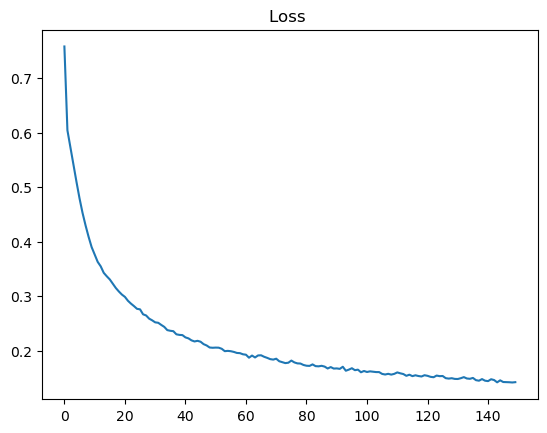

In [975]:
history.history.keys()

plt.plot(history.history['loss'])
plt.title('Loss ')
plt.show()

____________________________________

## 5. Making the predictions and evaluating the model

In [976]:
accuracy_test = ann.evaluate(X_test, y_test)

36/36 [==============================] - 0s 714us/step - loss: 0.3091 - accuracy: 0.8791


#### 1) Batchsize = 32

10 epox: 4 -> 5 -> 5 -> 5 ==> 0.7004 accuracy

10 epox: 4 -> 18 -> 18 -> 5 ==> 0.7680 accuracy

10 epox: 4 -> 54 -> 54 -> 5 ==> 0.8258 accuracy

10 epox: 4 -> 72 -> 72 -> 5 ==> 0.8418 accuracy

30 epox: 4 -> 18 -> 18 -> 5 ==> 0.8124 accuracy

30 epox: 4 -> 36 -> 36 -> 5 ==> 0.8480 accuracy

50 epox: 4 -> 72 -> 72 -> 5 ==> 0.8951 accuracy

150 epox: 4 -> 72 -> 72 -> 5 ==> 0.9031 accuracy
____________

#### 2) Batchsize = 64

10 epox: 4 -> 5 -> 5 -> 5 ==> 0.6569 accuracy

10 epox: 4 -> 18 -> 18 -> 5 ==> 0.7618 accuracy

10 epox: 4 -> 54 -> 54 -> 5 ==> 0.8142 accuracy

30 epox: 4 -> 18 -> 18 -> 5 ==> 0.8107 accuracy

30 epox: 4 -> 36 -> 36 -> 5 ==> 0.8551 accuracy

50 epox: 4 -> 54 -> 54 -> 5 ==> 0.8791 accuracy


_____________________________

## Testing ANN prediction on other subjects

In [977]:
smpl = pd.read_csv("C:/Users/miror/OneDrive - Ye9pfoBh9P/1_VUM_STUDY/3 year/01 Computational Intelligence/Assignment/Clean_Data_merged/test_cleandata.csv")

In [978]:
x2 = smpl.iloc[:, 1:-2].values
activity_10 = encoder.fit_transform(smpl['activity'])
y2 = activity_10

In [979]:
#Feature scalling
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(x2, y2, test_size = 1, random_state = 0)


sc = StandardScaler()
X_train_2 = sc.fit_transform(X_train_2)
X_test_2 = sc.fit_transform(X_test_2)


y_train_2 = np_utils.to_categorical(y_train_2)
y_test_2 = np_utils.to_categorical(y_test_2) 

In [980]:
accuracy_test = ann.evaluate(X_train_2, y_train_2)

78/78 [==============================] - 0s 714us/step - loss: 5.7229 - accuracy: 0.5990


### 1) 32 Batch size
10 epox: 4 -> 5 -> 5 -> 5 ==> 0.6726 accuracy

10 epox: 4 -> 18 -> 18 -> 5 ==> 0.7409 accuracy

10 epox: 4 -> 54 -> 54 -> 5 ==> 0.7429 accuracy

10 epox: 4 -> 72 -> 72 -> 5 ==> 0.7094 accuracy

30 epox: 4 -> 18 -> 18 -> 5 ==> 0.6653 accuracy

30 epox: 4 -> 36 -> 36 -> 5 ==> 0.6067 accuracy

50 epox: 4 -> 72 -> 72 -> 5 ==> 0.5756 accuracy

150 epox: 4 -> 72 -> 72 -> 5 ==> 0.5990 accuracy

-----------------------

### 2) 64 Batch size
10 epox: 4 -> 5 -> 5 -> 5 ==> 0.6358 accuracy

10 epox: 4 -> 18 -> 18 -> 5 ==> 0.7397 accuracy

10 epox: 4 -> 54 -> 54 -> 5 ==> 0.7304 accuracy

30 epox: 4 -> 18 -> 18 -> 5 ==> 0.7235 accuracy

30 epox: 4 -> 36 -> 36 -> 5 ==> 0.6225 accuracy

50 epox: 4 -> 54 -> 54 -> 5 ==> 0.5356 accuracy

_______________________